In [1]:
import numpy as np
from scipy.stats import qmc

from paref.black_box_functions.design_space.bounds import Bounds
from paref.express.info import Info
from paref.interfaces.moo_algorithms.blackbox_function import BlackboxFunction


class ZDT1(BlackboxFunction):
    def __call__(self, x: np.ndarray) -> np.ndarray:
        n = len(x)
        f1 = x[0]
        g = 1 + 9 / (n - 1) * np.sum(x[1:])
        h = 1 - np.sqrt(f1 / g)
        f2 = g * h
        y = np.array([f1, f2])
        return y

    @property
    def dimension_design_space(self) -> int:
        return 2

    @property
    def dimension_target_space(self) -> int:
        return 2

    @property
    def design_space(self) -> Bounds:
        return Bounds(upper_bounds=np.ones(self.dimension_design_space),
                      lower_bounds=np.zeros(self.dimension_design_space))

In [3]:
import numpy as np
from paref.black_box_functions.design_space.bounds import Bounds
from paref.interfaces.moo_algorithms.blackbox_function import BlackboxFunction


class ZDT2(BlackboxFunction):
    def __call__(self, x: np.ndarray) -> np.ndarray:
        n = len(x)
        f1 = x[0]
        g = 1 + 9 / (n - 1) * np.sum(x[1:])
        h = 1 - (f1 / g) ** 2
        f2 = g * h
        y = np.array([f1, f2])
        self._evaluations.append([x, y])  # store evaluation
        return y

    @property
    def dimension_design_space(self) -> int:
        return 5

    @property
    def dimension_target_space(self) -> int:
        return 2

    @property
    def design_space(self) -> Bounds:
        return Bounds(upper_bounds=np.ones(self.dimension_design_space),
                      lower_bounds=np.zeros(self.dimension_design_space))

In [4]:
bbf = ZDT1() #  2 concave, 1 convex

In [5]:
pareto_points_of_bbf = [
    i * np.eye(1, bbf.dimension_design_space, 0)[0]
    for i in np.arange(0, 1, 0.01)
]
pareto_front_of_bbf = np.array([bbf(point) for point in pareto_points_of_bbf])
bbf.clear_evaluations()

In [6]:
[bbf(x) for x in qmc.scale(qmc.LatinHypercube(d=bbf.dimension_design_space).random(n=20), bbf.design_space.lower_bounds,
                           bbf.design_space.upper_bounds)]  # add samples according to latin hypercube scheme

[array([0.41819886, 5.39416698]),
 array([0.65430428, 5.77276511]),
 array([0.87994431, 1.22911899]),
 array([0.35760194, 6.00109302]),
 array([0.84677927, 1.9512573 ]),
 array([0.29629497, 0.68225741]),
 array([0.02630657, 1.92205152]),
 array([0.74244192, 0.51853671]),
 array([0.55491474, 6.67415117]),
 array([0.5424936 , 1.99300615]),
 array([0.15865686, 4.96598708]),
 array([0.3432692 , 4.89934188]),
 array([0.13933241, 2.32727261]),
 array([0.61897573, 5.98782712]),
 array([0.08079227, 9.09207235]),
 array([0.95510185, 4.27405466]),
 array([0.20055473, 7.83246533]),
 array([0.78135793, 2.97466798]),
 array([0.91655866, 3.06925629]),
 array([0.48312854, 2.93279253])]

In [7]:
from paref.express.express_search import ExpressSearch

moo = ExpressSearch(bbf)

moo.minimal_search(max_evaluations=10)

Obtaining optimal number of training iterations...


100%|██████████| 1000/1000 [00:01<00:00, 905.75it/s]


Optimal Training iterations: 1000
[1.    0.001]
[0.001 1.   ]

----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 912.20it/s]



Starting Optimization...

 Found Pareto point: 
 x=[3.03152429e-06 1.69060448e-03] 
 prediction=[6.20039387e-04 1.00633430e+00] 
 standard deviation=[0.01270144 0.1247803 ]

Evaluating blackbox function...
Value of blackbox function:  [3.03152429e-06 1.01346112e+00]
Difference to estimation:  [ 0.00061701 -0.00712682] 

[1.    0.001]
[0.001 1.   ]

----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 876.29it/s]



Starting Optimization...

 Found Pareto point: 
 x=[5.72496823e-07 1.11068136e-03] 
 prediction=[3.12522368e-04 1.00534598e+00] 
 standard deviation=[0.01127355 0.10749457]

Evaluating blackbox function...
Value of blackbox function:  [5.72496823e-07 1.00923572e+00]
Difference to estimation:  [ 0.00031195 -0.00388974] 

[1.    0.001]
[0.001 1.   ]
Convergence reached. The 2-distance of the last two points found is 0.004225392927385747.

----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 876.16it/s]



Starting Optimization...

 Found Pareto point: 
 x=[9.32546880e-01 4.91670746e-06] 
 prediction=[9.31672482e-01 3.58822143e-04] 
 standard deviation=[0.01279178 0.12476683]

Evaluating blackbox function...
Value of blackbox function:  [0.93254688 0.03433822]
Difference to estimation:  [-0.0008744  -0.03397939] 

[1.    0.001]
[0.001 1.   ]

----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 865.53it/s]



Starting Optimization...

 Found Pareto point: 
 x=[9.08178144e-01 1.82888906e-06] 
 prediction=[0.90777636 0.0187885 ] 
 standard deviation=[0.01142665 0.11084628]

Evaluating blackbox function...
Value of blackbox function:  [0.90817814 0.04702481]
Difference to estimation:  [-0.00040179 -0.0282363 ] 

[1.    0.001]
[0.001 1.   ]
Convergence reached. The 2-distance of the last two points found is 0.02747334768919383.
End of sequence reached. Algorithm stopped.
Access the best fitting Pareto points by calling the attributes 'minima_components' and 'max_point'.


In [8]:
moo.max_point

array([[0.29629497, 0.68225741]])

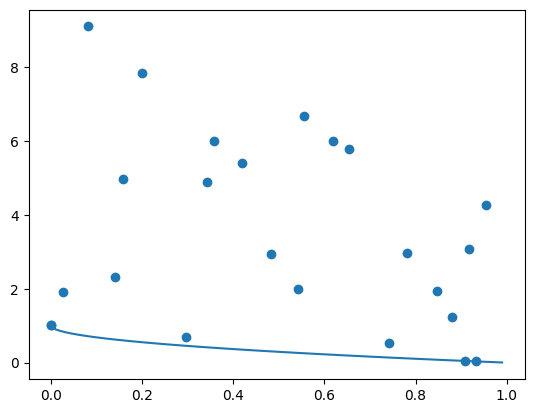

In [9]:
import matplotlib.pyplot as plt

plt.plot(pareto_front_of_bbf.T[0], pareto_front_of_bbf.T[1])
plt.scatter(bbf.y.T[0], bbf.y.T[1])



In [10]:
moo._one_points

array([[5.72496823e-07, 1.00923572e+00],
       [9.32546880e-01, 3.43382157e-02]])

In [11]:
len(bbf.y)

24

Lets collect a bit of information about our Pareto front before making a decision which Pareto point to look for. 
This significantly reduces the time and computational effort to obtain good results. 

In [12]:
info = Info(bbf,training_iter=1000)

Obtaining information about the approximate Pareto front...


100%|██████████| 1000/1000 [00:01<00:00, 874.29it/s]


[1.    0.001]
[0.001 1.   ]
Starting minimization...
finished!
Value of blackbox:  [2.09073027e-04 1.00248129e+00]
[1.    0.001]
[0.001 1.   ]
Starting minimization...
finished!
Value of blackbox:  [0.9152181  0.02810041]
Starting minimization...
finished!
Value of blackbox:  [0.37189461 0.37334912]
Starting minimization...
finished!
Value of blackbox:  [0.39269855 0.34722742]
Done! You can access the following information about your Pareto front:
        * model fitness: how well the model approximates the bbf, how to improve it and how certain its estimation is (Info.model_fitness)
        * topology: the shape of your Pareto front (Info.topology)
        * suggestion_pareto_points: suggestions for Pareto points to evaluate, how and why (Info.suggestion_pareto_points)
        * minima: the estimated minima of each component (Info.minima)
        


In [13]:
len(bbf.y)

24

In [14]:
info.edge_points

array([[5.72496823e-07, 1.00923572e+00],
       [9.15218104e-01, 2.81004072e-02]])

In [15]:
len(bbf.y)

24

In [16]:
info.maximal_pareto_point

array([0.37189461, 0.37334912])

In [17]:
len(bbf.y)

24

In [18]:
info.topology

(Almost) Global optimum    Shape      Dimension Pareto front
-------------------------  -------  ------------------------
False                      Convex                          1


In [19]:
info.minima

  Component      Minimum        Std
-----------  -----------  ---------
          0  5.72497e-07  0.0115024
          1  0.0281004    0.105044


The model has converged. The training iterations seem to be sufficient.
The uncertainty of your model seems to be low. Accordingly, you might only need few evaluations to obtain good results. I suggest you allow each algorithm the minimal number of evaluations by using the convergence_reached stopping criterion.
  Component    Average uncertainty (%) at 1000 training iterations
-----------  -----------------------------------------------------
          0                                                8.99888
          1                                                5.43


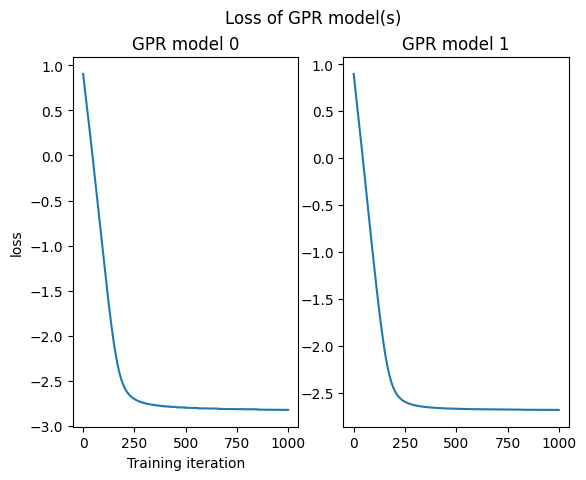

In [20]:
info.model_fitness

In [21]:
info.suggestion_pareto_points


            Your objectives appear to be conflicting, so there are real trade-offs.
            As your Pareto front appears to be convex, you may be able to achieve improvements in all
            components while suffering a smaller loss in others.
            A Pareto point that represents a real trade-off in all components I've found is
            
Target values                              Std                                            Dominates x% of evaluations
-----------------------------------------  -------------------------------------------  -----------------------------
[0.37189461373932603, 0.3733491234955532]  [0.011039298952830024, 0.10915292586874037]                             50

            You can get the corresponding design by using ...
            


In [22]:
# express search THEN use update

In [23]:
info._minima_pareto_points

array([[5.72496823e-07, 1.00923572e+00],
       [9.15218104e-01, 2.81004072e-02]])

In [24]:
info._surrogate.x

array([[4.18198859e-01, 6.79966161e-01],
       [6.54304280e-01, 7.85638656e-01],
       [8.79944311e-01, 1.99812051e-01],
       [3.57601942e-01, 7.39521052e-01],
       [8.46779274e-01, 3.03110229e-01],
       [2.96294969e-01, 3.37548731e-02],
       [2.63065699e-02, 1.28938937e-01],
       [7.42441915e-01, 6.80887479e-02],
       [5.54914737e-01, 8.77330742e-01],
       [5.42493603e-01, 2.59872692e-01],
       [1.58656859e-01, 5.48498199e-01],
       [3.43269199e-01, 5.97680515e-01],
       [1.39332408e-01, 2.18958531e-01],
       [6.18975733e-01, 8.05245894e-01],
       [8.07922709e-02, 9.98943340e-01],
       [9.55101850e-01, 6.47523410e-01],
       [2.00554734e-01, 9.10008733e-01],
       [7.81357930e-01, 4.37685255e-01],
       [9.16558658e-01, 4.74029237e-01],
       [4.83128537e-01, 3.76551482e-01],
       [3.03152429e-06, 1.69060448e-03],
       [5.72496823e-07, 1.11068136e-03],
       [9.32546880e-01, 4.91670746e-06],
       [9.08178144e-01, 1.82888906e-06],
       [5.015451

---

In [25]:
import scipy as sp

In [26]:
span = np.array([[1, 0, 0], [1, 1, 0], [2, 1, 0]])

In [27]:
sp.linalg.orth(span.T).T

array([[ 0.8816746 ,  0.47185793,  0.        ],
       [-0.47185793,  0.8816746 ,  0.        ]])

In [28]:
sp.linalg.orth((info.edge_points - info.edge_points[0]).T).T

array([[-0.68211557,  0.73124438]])

In [29]:
info.edge_points - info.edge_points[0]

array([[ 0.        ,  0.        ],
       [ 0.91521753, -0.98113532]])

In [30]:
basis = sp.linalg.orth((info.edge_points - info.edge_points[0]).T).T
projected_point = np.sum(np.array([np.dot(info.maximal_pareto_point - info.edge_points[0], basis_vector) * basis_vector
                                   for basis_vector in basis]), axis=0)
min_edges = np.min(info.edge_points, axis=0) - info.edge_points[0]
concave_degree = np.linalg.norm(info.maximal_pareto_point - info.edge_points[0] - min_edges)/np.linalg.norm(projected_point- min_edges) 

if concave_degree<0.5:
    concave_degree_description = "Strongly convex"

elif concave_degree<0.9:
    concave_degree_description = "Convex"
    
elif concave_degree<1.1:
    concave_degree_description = "Linear"
    
elif concave_degree<1.3:
    concave_degree_description = "Concave"
    
else:
    concave_degree_description = "Strongly convex"

In [31]:
concave_degree

0.7582328445058456

In [32]:
concave_degree_description

'Convex'

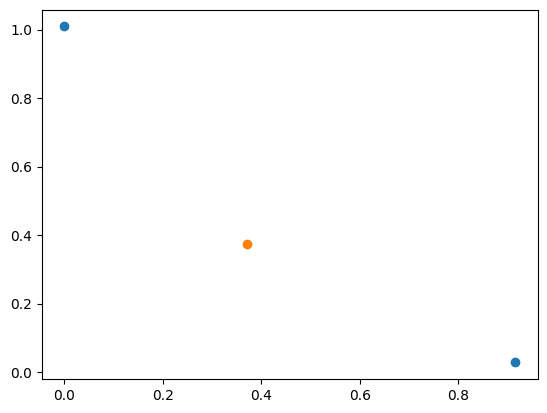

In [33]:
import matplotlib.pyplot as plt

plt.scatter(info.edge_points[:, 0], info.edge_points[:, 1])
plt.scatter(info.maximal_pareto_point[0], info.maximal_pareto_point[1])


(-2.0, 2.0)

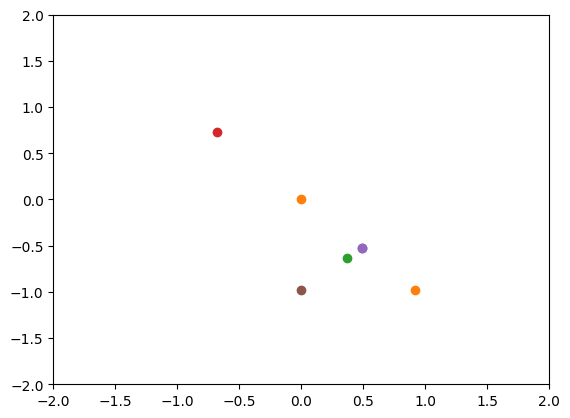

In [34]:
plt.scatter(projected_point[0], projected_point[1])
x = info.edge_points[0]
plt.scatter(info.edge_points[:, 0] - x[0], info.edge_points[:, 1] - x[1])
plt.scatter((info.maximal_pareto_point - info.edge_points[0])[0], (info.maximal_pareto_point - info.edge_points[0])[1])
plt.scatter(basis[:, 0], basis[:, 1])
plt.scatter(projected_point[0], projected_point[1])
plt.scatter(min_edges[0], min_edges[1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])